In [8]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [9]:
# Create a set of random latitude and longitude combinations
lat = np.random.uniform(low=-90.00,high=90.00,size=1500)
lngs = np.random.uniform(low=-180.00,high=180.00,size=1500)
lat_lngs = zip(lat,lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Create a list to hold the cities
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm enough were counted
len(cities)

607

In [14]:
import requests
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87a037a627de8d5de46e326cbf3bcdfb&q=Boston


In [18]:
# Make a 'get' request for the city weather of boston
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [19]:
# Get the text of the 'Get' request
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"base":"stations","main":{"temp":78.26,"feels_like":77.43,"temp_min":70.95,"temp_max":85.6,"pressure":1017,"humidity":35},"visibility":10000,"wind":{"speed":13.8,"deg":110},"clouds":{"all":40},"dt":1657488244,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1657444601,"sunset":1657498926},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [20]:
# Get the json text of the 'Get' request
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 78.26,
  'feels_like': 77.43,
  'temp_min': 70.95,
  'temp_max': 85.6,
  'pressure': 1017,
  'humidity': 35},
 'visibility': 10000,
 'wind': {'speed': 13.8, 'deg': 110},
 'clouds': {'all': 40},
 'dt': 1657488244,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1657444601,
  'sunset': 1657498926},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [21]:
# Test if we get JSON formatted data from the endpoint url we created
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code==200:
    print(f"City weather found.")
else:
    print(f"City weather not found.")
    

City weather not found.


In [22]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 77.29,
  'feels_like': 76.46,
  'temp_min': 70.16,
  'temp_max': 84.96,
  'pressure': 1017,
  'humidity': 37},
 'visibility': 10000,
 'wind': {'speed': 13.8, 'deg': 110},
 'clouds': {'all': 40},
 'dt': 1657489163,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1657444601,
  'sunset': 1657498926},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [23]:
# Get json data
boston_data = city_weather.json()

In [24]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1657444601,
 'sunset': 1657498926}

In [25]:
boston_data['sys']['country']

'US'

In [26]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 84.96 37 40 13.8


In [27]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 7, 10, 21, 39, 23)

In [28]:
# import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [29]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning data retrieval   ")
print("---------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i,city in enumerate(cities):
    
    # Group cities into sets of 50 for logging purposes.
    if (i % 50==0 and i>=50):
        set_count+=1
        record_count+=1
        time.sleep(60)
        
    # Create endpoint url for each city.
    city_url=url+"&q="+city.replace(" ","+")
    
    # Log the URL, record and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record counter.
    record_count+=1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City":city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is encountered, skip the city.
    except:
        print("City not found. Going to next...")
        pass
    
# Indicate that data loading is complete.
print('--------------------------------')
print('Data Retrieval completed.')
print('--------------------------------')
    

Beginning data retrieval   
---------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | leningradskiy
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | papara
Processing Record 5 of Set 1 | tevaitoa
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Going to next...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | kawambwa
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | marsabit
Processing Record 11 of Set 1 | nome
Processing Record 12 of Set 1 | ontario
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | lavrentiya
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | constitucion
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | tasiilaq
Pr

Processing Record 187 of Set 4 | sentyabrskiy
City not found. Going to next...
Processing Record 188 of Set 4 | arraial do cabo
Processing Record 189 of Set 4 | villanueva
Processing Record 190 of Set 4 | hambantota
Processing Record 191 of Set 4 | warrnambool
Processing Record 192 of Set 4 | kismayo
Processing Record 193 of Set 4 | viedma
Processing Record 194 of Set 4 | maceio
Processing Record 195 of Set 4 | gamba
Processing Record 196 of Set 4 | lagoa
Processing Record 197 of Set 4 | east london
Processing Record 198 of Set 4 | takoradi
Processing Record 199 of Set 4 | bluff
Processing Record 200 of Set 4 | mahebourg
Processing Record 201 of Set 4 | bayir
Processing Record 202 of Set 4 | campoverde
Processing Record 203 of Set 4 | samarai
Processing Record 205 of Set 5 | fortuna
Processing Record 206 of Set 5 | georgetown
Processing Record 207 of Set 5 | orichi
Processing Record 208 of Set 5 | northam
Processing Record 209 of Set 5 | mitsamiouli
Processing Record 210 of Set 5 | por

Processing Record 374 of Set 8 | mayskiy
Processing Record 375 of Set 8 | salinopolis
Processing Record 376 of Set 8 | upington
Processing Record 377 of Set 8 | fukue
Processing Record 378 of Set 8 | severouralsk
Processing Record 379 of Set 8 | lalmohan
Processing Record 380 of Set 8 | alindao
Processing Record 381 of Set 8 | bam
Processing Record 382 of Set 8 | dong hoi
Processing Record 383 of Set 8 | puerto carreno
Processing Record 384 of Set 8 | kaeo
Processing Record 385 of Set 8 | ust-kuyga
Processing Record 386 of Set 8 | gizo
Processing Record 387 of Set 8 | kousseri
Processing Record 388 of Set 8 | jawa
Processing Record 389 of Set 8 | berdigestyakh
Processing Record 390 of Set 8 | juneau
Processing Record 391 of Set 8 | ahipara
Processing Record 392 of Set 8 | fevralsk
City not found. Going to next...
Processing Record 393 of Set 8 | trois-rivieres
Processing Record 394 of Set 8 | saldanha
Processing Record 395 of Set 8 | viligili
City not found. Going to next...
Processing

Processing Record 558 of Set 11 | subaytilah
City not found. Going to next...
Processing Record 559 of Set 11 | raisen
Processing Record 560 of Set 11 | nurlat
Processing Record 562 of Set 12 | japura
Processing Record 563 of Set 12 | mantua
Processing Record 564 of Set 12 | luzino
Processing Record 565 of Set 12 | sidi ali
Processing Record 566 of Set 12 | ust-ishim
Processing Record 567 of Set 12 | villazon
Processing Record 568 of Set 12 | katherine
Processing Record 569 of Set 12 | oia
Processing Record 570 of Set 12 | flinders
Processing Record 571 of Set 12 | aklavik
Processing Record 572 of Set 12 | kulhudhuffushi
Processing Record 573 of Set 12 | lahaina
Processing Record 574 of Set 12 | alcudia
Processing Record 575 of Set 12 | gergebil
Processing Record 576 of Set 12 | chernyshevskiy
Processing Record 577 of Set 12 | chimbote
Processing Record 578 of Set 12 | peniche
Processing Record 579 of Set 12 | mount gambier
Processing Record 580 of Set 12 | roquetas de mar
Processing R

In [31]:
print(len(city_data))

552


In [40]:
# Convert the array of dictionaries to a Pandas dataframe.
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,77.05,50,40,14.97,CK,2022-07-10 23:56:56
1,Leningradskiy,69.3833,178.4167,38.16,86,100,12.80,RU,2022-07-11 00:01:50
2,Vaini,-21.2000,-175.2000,75.34,81,73,22.77,TO,2022-07-11 00:01:51
3,Papara,-3.9839,-38.7273,76.69,90,28,2.59,BR,2022-07-11 00:01:51
4,Tevaitoa,-16.7833,-151.5000,78.15,77,95,18.92,PF,2022-07-11 00:01:51
5,Ushuaia,-54.8000,-68.3000,21.15,90,13,5.39,AR,2022-07-11 00:01:52
6,Kawambwa,-9.7915,29.0791,55.11,56,6,5.59,ZM,2022-07-11 00:01:52
7,Ponta Do Sol,32.6667,-17.1000,70.43,76,7,3.67,PT,2022-07-11 00:01:52
8,Marsabit,2.3284,37.9899,59.59,75,37,23.87,KE,2022-07-11 00:01:53
9,Nome,64.5011,-165.4064,69.17,64,100,12.21,US,2022-07-11 00:01:53


In [42]:
# Create the output file (CSV)
output_data_file='weather_data/cities.csv'

# Export the city_data into a CSV
city_data_df.to_csv(output_data_file,index_label='City_ID')

In [43]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

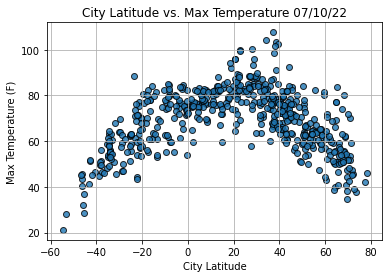

In [45]:
# Import time module
import time

# Build the scatterplot for latitude vs max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor='black',
           linewidths=1,
           marker='o',
           alpha=0.8,
           label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('City Latitude')
plt.grid(True)
          
# Save the figure.
plt.savefig("weather_data/Fig1.png")
          
# Show plot
plt.show()

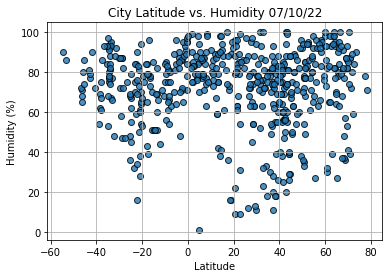

In [46]:
# Build the scatterplot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

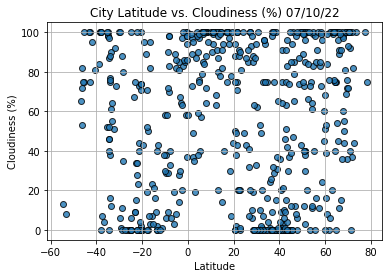

In [47]:
# Build the scatterplot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

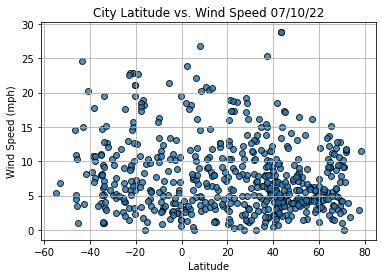

In [48]:
# Build the scatterplot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()